# Лабораторная работа 6

реализовать алгоритм c-means


In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def dist(obj1, obj2):
    sum = 0
    for i in range(len(obj1)):
        sum += np.square(obj1[i] - obj2[i])
    return np.sqrt(sum)

In [3]:
def get_centroids(centroids, matrix, fuzzifier, objects):
    rows = len(objects)
    for i in range(len(centroids)):
        column = matrix[:, i]
        numerator = 0
        denominator = 0
        for j in range(rows):
            numerator += column[j]**fuzzifier*objects[j]
            denominator += column[j] ** fuzzifier
        centroids[i] = numerator / denominator
    return centroids

def cmeans(objects, clusters, fuzzifier, max_iterations, epsilon):
    length = len(objects)
    prob_matrix = np.random.rand(length, clusters)
    for i in range (length):
        s = sum(prob_matrix[i, :])
        for j in range(clusters):
            prob_matrix[i,j] = prob_matrix[i,j] / s
    centroids = np.zeros([clusters, len(objects[0])])
    target_function = np.inf
    num_iterations = 0
    while True:
        centroids = get_centroids(centroids, prob_matrix, fuzzifier, objects)
        for i in range(length):
            for j in range(clusters):
                s = 0
                num = dist(objects[i], centroids[j])
                for k in range(clusters):
                    s += (num / dist(objects[i], centroids[k])) ** (2 / (fuzzifier - 1))
                prob_matrix[i,j] = 1 / s
        num_iterations += 1
        if num_iterations >= max_iterations:
            break
        new_target_function = 0
        for i in range(length):
            for j in range(clusters):
                new_target_function += prob_matrix[i, j] ** fuzzifier * dist(objects[i], centroids[j]) ** 2
        if target_function - new_target_function < epsilon:
            break
        else:
            target_function = new_target_function
    return prob_matrix, centroids

Objects
 [6 9] [6 1] [1 2] [8 7] [3 5] [6 3] [5 3] [5 8] [8 2] [8 1]
Matrix
 [[0.05059845 0.94940155]
 [0.9689507  0.0310493 ]
 [0.67933823 0.32066177]
 [0.17313469 0.82686531]
 [0.4390309  0.5609691 ]
 [0.96539253 0.03460747]
 [0.92886135 0.07113865]
 [0.0192804  0.9807196 ]
 [0.89057032 0.10942968]
 [0.89314721 0.10685279]]
Centroids
 [5.91866451 2.15599377] [5.63238881 7.46325692]


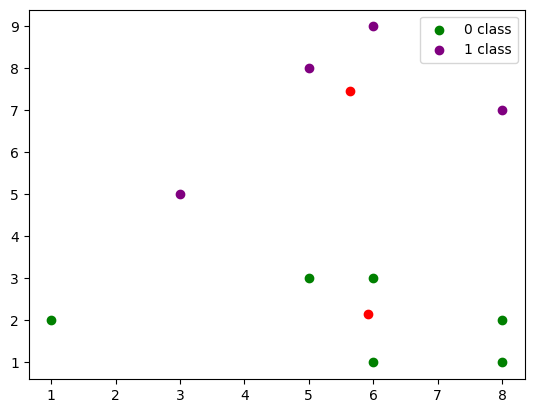

In [12]:
np.random.seed(1)
objects = np.random.randint(1,10, size=(10, 2))

matrix, centroids = cmeans(objects, 2, 2, 100, 0.1)
print("Objects\n", *objects)
print("Matrix\n", matrix)
print("Centroids\n", *centroids)
colors = ['g', 'purple', 'black', 'y']
for k in range(len(centroids)):
    first = np.array([[*objects[i]] for i in range(len(objects)) if matrix[i][k] >= 0.5])
    plt.scatter(first[:,0], first[:,1], c=colors[k], label=f"{k} class")
plt.scatter(centroids[:,0], centroids[:,1], c="r")
plt.legend()
plt.show()

[[0.96443462 0.0158915  0.01967388]
 [0.02768117 0.89490717 0.07741166]
 [0.05809489 0.10205758 0.83984753]
 [0.78544803 0.12865216 0.08589981]
 [0.11389666 0.08264424 0.8034591 ]
 [0.07512756 0.76651344 0.158359  ]
 [0.09794264 0.48057069 0.42148667]
 [0.92928833 0.02734638 0.04336528]
 [0.02534786 0.94258478 0.03206737]
 [0.02780206 0.93058378 0.04161416]]
[[6.12180895 8.06953703]
 [6.98696092 1.75649995]
 [2.53247449 3.41930412]]


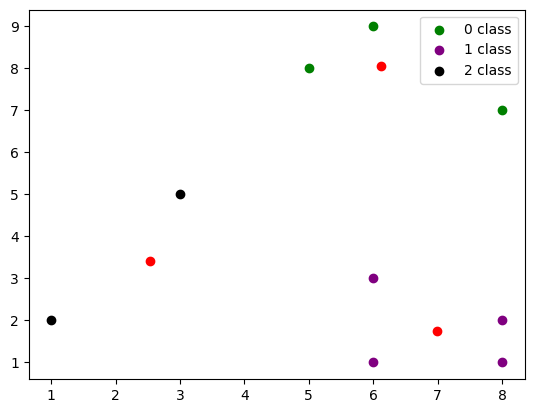

In [14]:
np.random.seed(1)
objects = np.random.randint(1,10, size=(10, 2))

matrix, centroids = cmeans(objects, 3, 2, 100, 0.1)
print(matrix)
print(centroids)
colors = ['g', 'purple', 'black', 'y']
for k in range(len(centroids)):
    first = np.array([[*objects[i]] for i in range(len(objects)) if matrix[i][k] >= 0.5])
    plt.scatter(first[:,0], first[:,1], c=colors[k], label=f"{k} class")
plt.scatter(centroids[:,0], centroids[:,1], c="r")
plt.legend()
plt.show()

In [9]:
t = [0,3,1,0,0] # 0 
o = [4,0,1,1,1] # 1
c = [2,24,9,1,1] # 2
p = [1,0,4,1,0] # 3
ob = [3,0,4,0,0] # 4
objects = np.array([t,o,c,p,ob])

matrix, centroids = cmeans(objects, 3, 2, 100, 0.1)
print(matrix)
print(centroids)
# colors = ['g', 'pink', 'y']
# for k in range(len(centroids)):
#     first = np.array([[*objects[i]] for i in range(len(objects)) if matrix[i][k] >= 0.5])
#     plt.scatter(first[:,0], first[:,1], c=colors[k])
# plt.scatter(centroids[:,0], centroids[:,1], c="r")
# plt.show()

[[4.57896186e-01 5.30848636e-01 1.12551785e-02]
 [4.94195830e-01 4.99901829e-01 5.90234091e-03]
 [3.07894716e-08 3.10806648e-08 9.99999938e-01]
 [5.47176021e-01 4.49446135e-01 3.37784411e-03]
 [5.58030070e-01 4.38620094e-01 3.34983615e-03]]
[[ 2.03455591  0.65662307  2.61060279  0.52079758  0.24425805]
 [ 1.97013824  0.83399463  2.40035228  0.48076011  0.2552177 ]
 [ 1.99982335 23.99599241  8.99861172  0.99986474  0.99985282]]


In [6]:
def prim_alg(matrix):
    size = len(matrix[0])
    ans_matrix = np.zeros([size, size])
    rows_in_vision = set()
    columns_in_vision = set()
    for i in range(size):
        rows_in_vision.add(i)
    min_el = np.inf
    row_ind = 0
    col_ind = 0
    for i in range(size):
        for j in range(size):
            if  matrix[i, j] > 0 and matrix[i, j] < min_el:
                min_el = matrix[i, j]
                row_ind = i
                col_ind = j
    rows_in_vision.remove(row_ind)
    rows_in_vision.remove(col_ind)
    columns_in_vision.add(row_ind)
    columns_in_vision.add(col_ind)
    ans_matrix[row_ind, col_ind] = matrix[row_ind, col_ind]
    ans_matrix[col_ind, row_ind] = matrix[row_ind, col_ind]
    while len(rows_in_vision) > 0:
        min_el = np.inf
        for i in rows_in_vision:
            for j in columns_in_vision:
                if matrix[i, j] > 0 and matrix[i, j] < min_el:
                    min_el = matrix[i, j]
                    row_ind = i
                    col_ind = j
        ans_matrix[row_ind, col_ind] = matrix[row_ind, col_ind]
        ans_matrix[col_ind, row_ind] = matrix[row_ind, col_ind]
        rows_in_vision.remove(row_ind)
        columns_in_vision.add(row_ind)
        columns_in_vision.add(col_ind)
    return ans_matrix

In [7]:
matrix = np.array([[0, 25, 0, 26, 0, 15],
          [25, 0, 23, 0, 20, 18],
          [0, 23, 0, 19, 21, 0],
          [26, 0, 19, 0, 0, 0],
          [0, 20, 21, 0, 0, 12],
          [15, 18, 0, 0, 12, 0]])

ans = prim_alg(matrix)
print(ans)

[[ 0.  0.  0.  0.  0. 15.]
 [ 0.  0.  0.  0.  0. 18.]
 [ 0.  0.  0. 19. 21.  0.]
 [ 0.  0. 19.  0.  0.  0.]
 [ 0.  0. 21.  0.  0. 12.]
 [15. 18.  0.  0. 12.  0.]]
